In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
#classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(128, activation='relu'))
#classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
classifier.add(Dense(1, activation='relu'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#pip install --upgrade tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/New Iris Data/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/New Iris Data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 500,
                         validation_data = test_set,
                         validation_steps = 59)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 1s 240ms/step - loss: 0.6967 - accuracy: 0.5441 - val_loss: 0.6769 - val_accuracy: 0.5833
Epoch 2/500
5/5 [==============================] - 1s 126ms/step - loss: 0.6720 - accuracy: 0.5882
Epoch 3/500
5/5 [==============================] - 1s 128ms/step - loss: 0.6890 - accuracy: 0.5221
Epoch 4/500
5/5 [==============================] - 1s 130ms/step - loss: 0.6877 - accuracy: 0.5515
Epoch 5/500
5/5 [==============================] - 1s 131ms/step - loss: 0.6864 - accuracy: 0.5515
Epoch 6/500
5/5 [==============================] - 1s 125ms/step - loss: 0.6954 - accuracy: 0.5368
Epoch 7/500
5/5 [==============================] - 1s 129ms/step - loss: 0.6911 - accuracy: 0.5441
Epoch 8/500
5/5 [==============================] - 1s 121ms/step - loss: 0.6862 - accuracy: 0.5368
Epoch 9/500
5/5 [==============================] - 1s 121ms/step - loss: 0.6930 - accuracy: 0.4779
Epoch 10/500
5/5 [==============================] - 1s 125ms/step - loss: 0.692

Text(0.5, 0, 'Epoch')

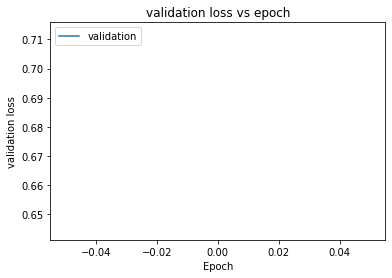

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

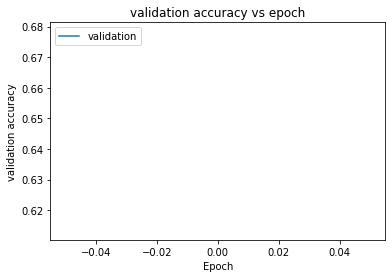

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/New Iris Data/test/male/114_1R.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Male'
else:
  prediction = 'Female'

In [ ]:
if result[0][0] == 1:
  prediction = 'Male'
  print('Male Iris')
else:
  prediction = 'Female'
  print('Female Iris')
result

Female Iris


array([[43.299343]], dtype=float32)